In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Loading csv file 

In [2]:

df = pd.read_csv("healthcare-dataset-stroke-data.csv")

# Data Exploration - Total records

In [3]:
row_count = df.shape[0]
print(row_count)

5110


# Data Exploration - NULL count

In [4]:

null_count = df.isna().sum().sum()
print("Total null count in dataframe: ",null_count)

Total null count in dataframe:  201


In [5]:
#Null count in specific column
null_count_column = df['bmi'].isna().sum()
print("Null count column wise: ",null_count_column)

Null count column wise:  201


# Mean, Median, Mode for each specific column

In [6]:
# Mean for numerical column
df2 = df[["age","avg_glucose_level","bmi"]].mean()
print(df2)


age                   43.226614
avg_glucose_level    106.147677
bmi                   28.893237
dtype: float64


In [7]:
# Median for numerical column
df2 = df[["age","avg_glucose_level","bmi"]].median()
print(df2)

age                  45.000
avg_glucose_level    91.885
bmi                  28.100
dtype: float64


In [8]:
# Standard deviation for numerical column
df2 = df[["age","avg_glucose_level","bmi"]].std()
print(df2)

age                  22.612647
avg_glucose_level    45.283560
bmi                   7.854067
dtype: float64


# Plotting charts - EDA

In [9]:
!pip install seaborn
import seaborn as sns
from seaborn import load_dataset

C:\Users\asawan\Desktop\DAX-DS-Aassignment-2022-Aditi_Sawant\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


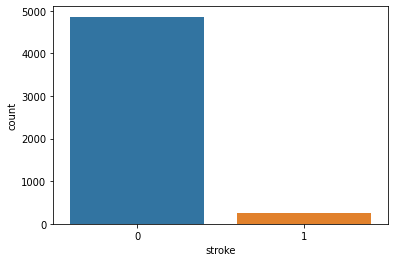

In [10]:
#Count Plot
sns.countplot(df['stroke'])
plt.show()

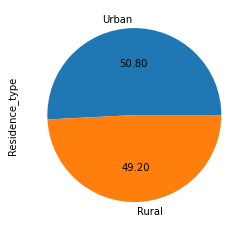

In [11]:
#Pie Chart
df['Residence_type'].value_counts().plot(kind="pie", autopct="%.2f")
plt.show()

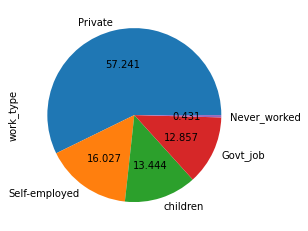

In [12]:
df['work_type'].value_counts().plot(kind="pie", autopct="%.3f")
plt.show()

C:\Users\asawan\Desktop\DAX-DS-Aassignment-2022-Aditi_Sawant\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


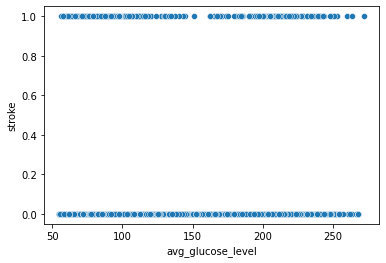

In [13]:
sns.scatterplot(df["avg_glucose_level"], df["stroke"])
plt.show()



C:\Users\asawan\Desktop\DAX-DS-Aassignment-2022-Aditi_Sawant\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


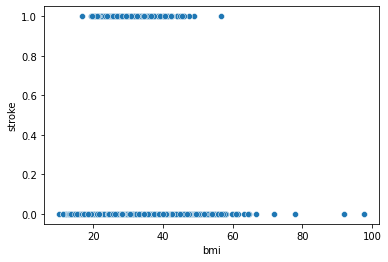

In [14]:
sns.scatterplot(df["bmi"], df["stroke"])
plt.show()

C:\Users\asawan\Desktop\DAX-DS-Aassignment-2022-Aditi_Sawant\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


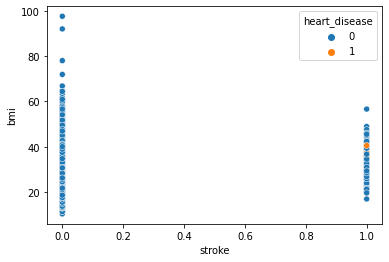

In [15]:
sns.scatterplot(df["stroke"], df["bmi"], hue=df["heart_disease"])
plt.show()

C:\Users\asawan\Desktop\DAX-DS-Aassignment-2022-Aditi_Sawant\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


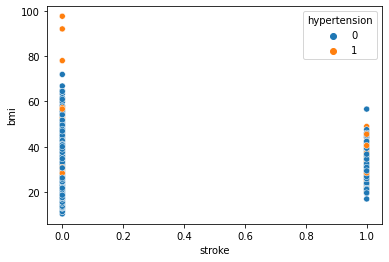

In [16]:
sns.scatterplot(df["stroke"], df["bmi"], hue=df["hypertension"])
plt.show()

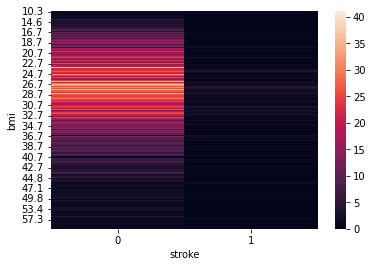

In [17]:
sns.heatmap(pd.crosstab(df['bmi'], df['stroke']))
plt.show()

C:\Users\asawan\Desktop\DAX-DS-Aassignment-2022-Aditi_Sawant\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


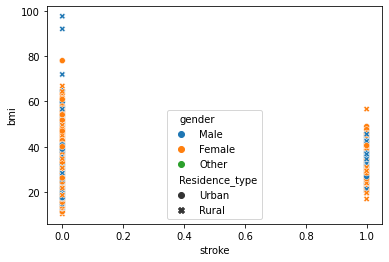

In [18]:
sns.scatterplot(df["stroke"], df["bmi"], hue=df["gender"], style=df['Residence_type'])
plt.show()

# Checking if bmi column has null values

In [19]:

isNull = df['bmi'].isna().sum()
if isNull>0:
    print("Null count: ",isNull)
else:
    print("Null count: ",0)
    


Null count:  201


# Percentage of null values

In [20]:

null_values = df.isnull().sum() * 100 / len(df)
null_values_percentage = pd.DataFrame({'bmi': df.columns,
                                 'percent of null values': null_values})
print("Null values percentage: ",null_values)

Null values percentage:  id                   0.000000
gender               0.000000
age                  0.000000
hypertension         0.000000
heart_disease        0.000000
ever_married         0.000000
work_type            0.000000
Residence_type       0.000000
avg_glucose_level    0.000000
bmi                  3.933464
smoking_status       0.000000
stroke               0.000000
dtype: float64


# replacing null values with median

In [21]:

median_value=df['bmi'].median()
df['bmi'].fillna(value=median_value, inplace=True)
print('Updated Dataframe:')
print(df)

Updated Dataframe:
         id  gender   age  hypertension  heart_disease ever_married  \
0      9046    Male  67.0             0              1          Yes   
1     51676  Female  61.0             0              0          Yes   
2     31112    Male  80.0             0              1          Yes   
3     60182  Female  49.0             0              0          Yes   
4      1665  Female  79.0             1              0          Yes   
...     ...     ...   ...           ...            ...          ...   
5105  18234  Female  80.0             1              0          Yes   
5106  44873  Female  81.0             0              0          Yes   
5107  19723  Female  35.0             0              0          Yes   
5108  37544    Male  51.0             0              0          Yes   
5109  44679  Female  44.0             0              0          Yes   

          work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0           Private          Urban             2

# Removal of outliers from any two numerical column

C:\Users\asawan\Desktop\DAX-DS-Aassignment-2022-Aditi_Sawant\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='avg_glucose_level'>

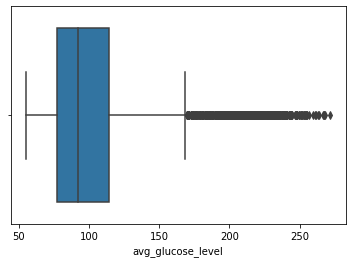

In [22]:
#to detect outliers: before
import seaborn as sns
sns.boxplot(df['avg_glucose_level'])

C:\Users\asawan\Desktop\DAX-DS-Aassignment-2022-Aditi_Sawant\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='bmi'>

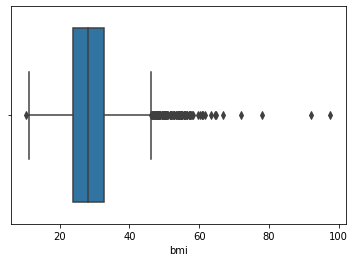

In [23]:
#to detect outliers: before
import seaborn as sns
sns.boxplot(df['bmi'])

In [24]:
#Removal of outliers 
cols = ['avg_glucose_level', 'bmi'] # one or more
Q1 = df[cols].quantile(0.25)
Q3 = df[cols].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df[cols] < (Q1 - 1.5 * IQR)) |(df[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

C:\Users\asawan\Desktop\DAX-DS-Aassignment-2022-Aditi_Sawant\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='avg_glucose_level'>

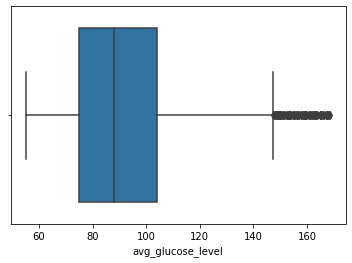

In [25]:
#After removal of outliers
import seaborn as sns
sns.boxplot(df['avg_glucose_level'])

C:\Users\asawan\Desktop\DAX-DS-Aassignment-2022-Aditi_Sawant\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='bmi'>

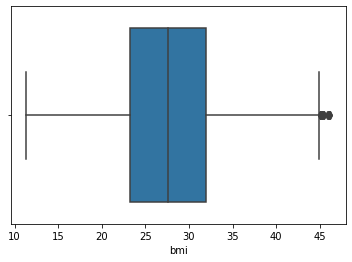

In [26]:
#After removal of outliers
import seaborn as sns
sns.boxplot(df['bmi'])

In [27]:
from sklearn.preprocessing import MinMaxScaler

# Scaling of numerical columns

In [28]:
scaler = MinMaxScaler()

df['age'] = scaler.fit_transform(df['age'].values.reshape(-1,1))
df['avg_glucose_level'] = scaler.fit_transform(df['avg_glucose_level'].values.reshape(-1,1))
df['bmi'] = scaler.fit_transform(df['bmi'].values.reshape(-1,1))

In [29]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
2,31112,Male,0.975586,0,1,Yes,Private,Rural,0.447341,0.607450,never smoked,1
6,53882,Male,0.902344,1,1,Yes,Private,Rural,0.131825,0.461318,never smoked,1
7,10434,Female,0.841309,0,0,No,Private,Urban,0.345808,0.329513,never smoked,1
8,27419,Female,0.719238,0,0,Yes,Private,Rural,0.185188,0.481375,Unknown,1
9,60491,Female,0.951172,0,0,Yes,Private,Urban,0.030380,0.369628,Unknown,1


# Encoding of columns

In [30]:
from sklearn.preprocessing import OneHotEncoder

In [31]:
# checking features
cat = df.select_dtypes(include='O').keys()
# display variabels
cat

Index(['gender', 'ever_married', 'work_type', 'Residence_type',
       'smoking_status'],
      dtype='object')

In [32]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
2,31112,Male,0.975586,0,1,Yes,Private,Rural,0.447341,0.607450,never smoked,1
6,53882,Male,0.902344,1,1,Yes,Private,Rural,0.131825,0.461318,never smoked,1
7,10434,Female,0.841309,0,0,No,Private,Urban,0.345808,0.329513,never smoked,1
8,27419,Female,0.719238,0,0,Yes,Private,Rural,0.185188,0.481375,Unknown,1
9,60491,Female,0.951172,0,0,Yes,Private,Urban,0.030380,0.369628,Unknown,1


In [33]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
2,31112,Male,0.975586,0,1,Yes,Private,Rural,0.447341,0.607450,never smoked,1
6,53882,Male,0.902344,1,1,Yes,Private,Rural,0.131825,0.461318,never smoked,1
7,10434,Female,0.841309,0,0,No,Private,Urban,0.345808,0.329513,never smoked,1
8,27419,Female,0.719238,0,0,Yes,Private,Rural,0.185188,0.481375,Unknown,1
9,60491,Female,0.951172,0,0,Yes,Private,Urban,0.030380,0.369628,Unknown,1


# label-encoding 

In [34]:


from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df['gender']= label_encoder.fit_transform(df['gender'])
df['gender'].unique()

df['ever_married']= label_encoder.fit_transform(df['ever_married'])
df['ever_married'].unique()

df['Residence_type']= label_encoder.fit_transform(df['Residence_type'])
df['Residence_type'].unique()

array([0, 1])

In [35]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
2,31112,1,0.975586,0,1,1,Private,0,0.447341,0.607450,never smoked,1
6,53882,1,0.902344,1,1,1,Private,0,0.131825,0.461318,never smoked,1
7,10434,0,0.841309,0,0,0,Private,1,0.345808,0.329513,never smoked,1
8,27419,0,0.719238,0,0,1,Private,0,0.185188,0.481375,Unknown,1
9,60491,0,0.951172,0,0,1,Private,1,0.030380,0.369628,Unknown,1


In [36]:
one_hot = pd.get_dummies(df['work_type'])
df = df.drop('work_type',axis = 1)
df = df.join(one_hot)
df

,id,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,Govt_job,Never_worked,Private,Self-employed,children
2,31112,1,0.975586,0,1,1,0,0.447341,0.607450,never smoked,1,0,0,1,0,0
6,53882,1,0.902344,1,1,1,0,0.131825,0.461318,never smoked,1,0,0,1,0,0
7,10434,0,0.841309,0,0,0,1,0.345808,0.329513,never smoked,1,0,0,1,0,0
8,27419,0,0.719238,0,0,1,0,0.185188,0.481375,Unknown,1,0,0,1,0,0
9,60491,0,0.951172,0,0,1,1,0.030380,0.369628,Unknown,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,0,0.975586,1,0,1,1,0.252113,0.481375,never smoked,0,0,0,1,0,0
5106,44873,0,0.987793,0,0,1,1,0.617119,0.822350,never smoked,0,0,0,0,1,0
5107,19723,0,0.426270,0,0,1,0,0.245421,0.553009,never smoked,0,0,0,0,1,0
5108,37544,1,0.621582,0,0,1,0,0.978954,0.409742,formerly smoked,0,0,0,1,0,0


In [37]:
one_hot_smoking_status = pd.get_dummies(df['smoking_status'])
df = df.drop('smoking_status',axis = 1)
df = df.join(one_hot_smoking_status)
df

,id,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,Govt_job,Never_worked,Private,Self-employed,children,Unknown,formerly smoked,never smoked,smokes
2,31112,1,0.975586,0,1,1,0,0.447341,0.607450,1,0,0,1,0,0,0,0,1,0
6,53882,1,0.902344,1,1,1,0,0.131825,0.461318,1,0,0,1,0,0,0,0,1,0
7,10434,0,0.841309,0,0,0,1,0.345808,0.329513,1,0,0,1,0,0,0,0,1,0
8,27419,0,0.719238,0,0,1,0,0.185188,0.481375,1,0,0,1,0,0,1,0,0,0
9,60491,0,0.951172,0,0,1,1,0.030380,0.369628,1,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,0,0.975586,1,0,1,1,0.252113,0.481375,0,0,0,1,0,0,0,0,1,0
5106,44873,0,0.987793,0,0,1,1,0.617119,0.822350,0,0,0,0,1,0,0,0,1,0
5107,19723,0,0.426270,0,0,1,0,0.245421,0.553009,0,0,0,0,1,0,0,0,1,0
5108,37544,1,0.621582,0,0,1,0,0.978954,0.409742,0,0,0,1,0,0,0,1,0,0
